## More Practice Problems

### Leetcode 714 Best Time to Buy and Sell Stock with Transaction Fee
* overview
  + given an array prices where prices\[i\] is the price of a given stock on the ith day, and an integer fee representing a transaction fee.
  + Find the maximum profit you can achieve. You may complete as many transactions as you like, but you need to pay the transaction fee for each transaction.
* this is a similar best time to buy and sell stock series problem
  + initialize a 2d dp array of n+1 and 2 elements on the two dimensions. The last element is the base case corresponding to 0 profit for both holding and unholding
  + traverse from n-1 to 0. For each iteration, traverse holding variable from 0 to 1
  + first assign dp(i)(j) = dp(i+1)(j) corresponding to do-nothing option
  + then process the holding == 1 and holding ==0 cases separately
    + if holding == 1, then dp(i)(j) = max(dp(i+1)(0)+prices(i)-fee, dp(i)(j)). This is to find the max between holding the stock and sell the stock at day i
    + if holding == 0, then dp(i)(j) = max(dp(i+1)(1)-prices(i), dp(i)(j)). This is to find the max between buy the stock at day i and not buy stock
  + finally, return dp(0)(0)
* the key point of this type of problem is that we only focus on the current day (day i)'s option of whether keeping the current holding status or change it, and then connect the corresponding status on the next day, and find the max
  + you can image by connectig all these status, the max option of the original status, which here is day 0, noholding will be obtained
* time complexity: O(n) where n the length of prices
* space complexity O(n) where n is the length of prices      

In [3]:
# bottom up
from typing import List
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        if not prices:
            return 0
        
        n = len(prices)
        dp = [[0] * 2 for _ in range(n+1)]
        
        for i in range(n-1, -1, -1):
            for j in range(2):
                dp[i][j] = dp[i+1][j]
                if j:
                    dp[i][j] = max(dp[i+1][0]+prices[i]-fee, dp[i][j])
                else:
                    dp[i][j] = max(dp[i+1][1]-prices[i], dp[i][j])
        return dp[0][0]   


### Leetcode 256 Paint House
* overview
  + There is a row of n houses, where each house can be painted one of three colors: red, blue, or green. The cost of painting each house with a certain color is different. You have to paint all the houses such that no two adjacent houses have the same color.
  + The cost of painting each house with a certain color is represented by an n x 3 cost matrix costs.
  + For example, costs\[0\]\[0\] is the cost of painting house 0 with the color red; costs\[1\]\[2\] is the cost of painting house 1 with color green, and so on...
  + Return the minimum cost to paint all houses.
* Algorithm (DP)
  + we just track the min cost to pain each house by the 3 colors, starting from hous 0 and finally return the min of house n among three colors

In [4]:
# optimized bottom up
from typing import List
class Solution:
    def minCost(self, costs: List[List[int]]) -> int:
        if not costs:
            return 0
        
        pre_costs = min_costs = [0, 0, 0]
        
        for red, green, blue in costs:
            min_costs = (red + min(pre_costs[1], pre_costs[2]), green + min(pre_costs[0], pre_costs[2]), blue+ min(pre_costs[0], pre_costs[1]))
            
            pre_costs = min_costs
            
        return min(pre_costs)     

### Leetcode 265. Paint House II
* overview
  + There are a row of n houses, each house can be painted with one of the k colors. The cost of painting each house with a certain color is different. You have to paint all the houses such that no two adjacent houses have the same color.
  + The cost of painting each house with a certain color is represented by an n x k cost matrix costs.
  + Return the minimum cost to paint all houses.
* algorithm
  + the logic is similar to Leetcode 256 Paint House. The difference is that instead of 3 colors, we have to consier k colors, which can be much greater than 3
  + the key point is how to manage and traverse the k values, and find the min cost corresponding to each color when painting the current house
  + The technique we used here is to find the pre_min_cost, pre_min_color and second_min_cost (we don't care the color of the second_min cost)
  + we first find the pre_min_color, pre_min_cost, pre_second_cost from the costs\[0\]
  + we then traverse cost\[1:\]
    + in each iteration of the house, we iterate each color, if the current color doesnot equal to the pre_min_color, we just add the current color cost to the pre_min_color, otherwise, add the cost to second_min_cost, this will be the min cost to paint the current house using this color
    + once we finish a color, we add the value to the curr_costs array
    + when we complete all the k colors for the current house, apply the same algorithm to curr_costs to update pre_min_cost, pre_min_color and pre_second_min_cost 
  + out of the for loop, return pre_min_cost    

In [ ]:
class Solution:
    def minCostII(self, costs: List[List[int]]) -> int:
        if not costs:
            return 0
        
        n, k = len(costs), len(costs[0])
        
        def find_two_mins(input_cost: List) -> Tuple[int, int, int]:
            min_cost, min_color, second_cost = None, None, None
            for i, cost in enumerate(input_cost):
                if min_cost is None or cost < min_cost:                    
                    min_color = i
                    second_cost = min_cost
                    min_cost = cost
                elif second_cost is None or cost < second_cost:
                    second_cost = cost
                    
            return (min_cost, min_color, second_cost)   
        
        pre_min_cost, pre_min_color, pre_second_cost = find_two_mins(costs[0])
        
        curr_costs = [0] * k
        
        for costs in (costs[1:]):
            for i, cost in enumerate(costs):
                if i != pre_min_color:
                    curr_cost = cost + pre_min_cost
                else:
                    curr_cost = cost + pre_second_cost
                curr_costs[i] = curr_cost 
            pre_min_cost, pre_min_color, pre_second_cost = find_two_mins(curr_costs)   
            
        return pre_min_cost       

### Leetcode 1473 Paint House III
* overview
  + There is a row of m houses in a small city, each house must be painted with one of the n colors (labeled from 1 to n), some houses that have been painted last summer should not be painted again
  + A neighborhood is a maximal group of continuous houses that are painted with the same color.
    + For example: houses = \[1,2,2,3,3,2,1,1\] contains 5 neighborhoods \[{1}, {2,2}, {3,3}, {2}, {1,1}\].
  + Given an array houses, an m x n matrix cost and an integer target where:
    + houses\[i\]: is the color of the house i, and 0 if the house is not painted yet.
    + cost\[i\]\[j\]: is the cost of paint the house i with the color j + 1.
* algorithm (DP)
  + similar to buy and sell stocks, we will have do-nothing and paint by any of the n colors options. The do-nothing is mandotory, if the current house has a non-zero color
  + the trick part is to convert the color index from 0 based to 1 based. color index of 0 means not colored. Whenever we paint a house, or a house has been painted, the color is 1-based
  + if we go to the base case of the mth house (the imaginary house, since all houses should have an index between 0 and m-1), and still have less than target groups, there is no solution, we should set these base cases as inf. If we have exactly target groups, the corresponding base case should have a value of 0
  + instead of recording the color the current house, we store its previous house's color as a state variable, and decide which next house state we need to connect (if the current color we select is the same as the pre-color, we connect to the next house's state of the same target group, with the same pre-color. Otherwise, we connect to the next house's state with target group increment by 1, and the color to paint the current house as the next house's pre-color 
    

In [1]:
# top down
from typing import List

class Solution:
    def minCost(self, houses: List[int], cost: List[List[int]], m: int, n: int, target: int) -> int:
        if not cost or not houses:
            return -1
        
        @lru_cache(None)
        def dp(index: int, pre_color: int, nb: int) -> int:
            if index == m:
                if nb == target:
                    return 0
                return float("inf")
            
            if nb > target:
                return float("inf")
            
            rs = float("inf")
            
            curr_color = houses[index]
            if curr_color != 0:
                if curr_color == pre_color:
                    return dp(index+1, pre_color, nb)
                else:
                    return dp(index+1, curr_color, nb+1)
            
            rs = float("inf")
            for color in range(1, n+1):
                curr_cost = cost[index][color-1]
                if color == pre_color:
                    rs = min(rs, dp(index+1, pre_color, nb) + curr_cost)
                else:
                    rs = min(rs, dp(index+1, color, nb+1)+ curr_cost)
            return rs
        
        rs = dp(0, 0, 0)
        return rs if rs < float("inf") else -1      

### Leetcode 1220 Count Vowels Permutation
* overview
  + Given an integer n, your task is to count how many strings of length n can be formed under the following rules:
    + Each character is a lower case vowel ('a', 'e', 'i', 'o', 'u')
    + Each vowel 'a' may only be followed by an 'e'.
    + Each vowel 'e' may only be followed by an 'a' or an 'i'.
    + Each vowel 'i' may not be followed by another 'i'.
    + Each vowel 'o' may only be followed by an 'i' or a 'u'.
    + Each vowel 'u' may only be followed by an 'a'.
  + Since the answer may be too large, return it modulo 10^9 + 7.
* algorithm
  + we can translate the rules into the following transition rules:
  ```python
    table = {
                '#': ['a', 'e', 'i', 'o', 'u'],
                'a': ['e'],
                'e': ['a', 'i'],
                'i': ['a', 'e', 'o', 'u'],
                'o': ['i', 'u'],
                'u' : ['a']
            }
  ```
  + state variable
    + current index of letter in the string
    + current letter 
  + recurrence relationship
    + based on the current letter, sum the values of all the possible letters following the transition rules
  + base cases
    + if index == length, return 1 since index 0 is used for starting char of #, which leads to all five vowel letters
    
* top down
  + follow the transition rules until index == n, return 1
  + time complexity: O(n)
  + space complexity: O(n) since the stack will go to all n letters in the string
  
* bottom up
  + starting from the first letter of a, e, i, o, u, we have one solution for each of the letter, as represented as
    + a = e = i = o = u = 1
  + then go follow the transition rule for the next step, which is stored in aa, ee, ii, oo, uu as the next step following the transition rules:
    + substring ending with a can be obtained from substrings of the previous step ending with e, i, and u 
    + substring ending with e can be obtained from substrings of the pevious step ending with a and i
    + substring ending with i can be obtained from substrings of the pevious step ending with e and o
    + substring ending with o can be obtained from substrings of the pevious step ending with i
    + substring ending with u can be obtained from substrings of the pevious step ending with i and o
  + time complexity: O(n)
  + space complexity O(1)

In [ ]:
# top down
from typing import List

class Solution:
    def countVowelPermutation(self, n: int) -> int:
        table = {
            '#': ['a', 'e', 'i', 'o', 'u'],
            'a': ['e'],
            'e': ['a', 'i'],
            'i': ['a', 'e', 'o', 'u'],
            'o': ['i', 'u'],
            'u' : ['a']
        }
        
        N = 10**9 + 7
        
        @lru_cache(None)
        def dp(index: int, curr: str) -> int:
            if index == n:
                return 1
            
            rs = 0
            for l in table[curr]:
                rs += dp(index+1, l) % N
                
            return rs % N
        
        return dp(0, '#')



In [ ]:
class Solution:
    def countVowelPermutation(self, n: int) -> int:
        N = 10**9 + 7
        
        # define the number of solutions ending with each letter when letter length is 1
        a = e = i = o = u = 1
        
        # iterate n-1 times since we have already initialize the one letter substrings ending with each letter
        for _ in range(1, n):            
            aa = (e + i + u) % N
            ee = (a + i) % N
            ii = (e + o) % N
            oo = i
            uu = (i + o) % N
            
            a = aa
            e = ee
            i = ii
            o = oo
            u = uu
        return (a + e + i + o + u) % N    

### Leetcode 718 Maximum length of Repeated Subarray
* overview
  + Given two integer arrays nums1 and nums2, return the maximum length of a subarray that appears in both arrays.
* algorithm
  + if we have two letters matched, since the subarrays need to be continuous, we add 1 to its right down diagnal results. 
  + to exhuast all the possible mathes, we start from the last number of num 1, and search all the numbers in number2
  + start from the end of the two arrays, where in base case, the imaginary case where indexes of nums1 and nums2 are n1, and n2, respectively, we got matched length as 0
  + for each number in nums1, we find the max length of matched subarray starting from the current index.
    + since we start from the end of the array, if the current number matches a number in nums2, we obtain dp(i)(j) from dp(i+1)(j+1)+1 so that continuous subarrays with numbers matched from nums1 and nums2 can be counted
  + since there is no trend in the dp values, each time we find a number match and update the dp values, we update the rs to find the max rs  
    

In [4]:
# bottom up
from typing import List
class Solution:
    def findLength(self, nums1: List[int], nums2: List[int]) -> int:
        if not nums1 or not nums2:
            return 0
        
        m, n = len(nums1), len(nums2)
        
        dp = [[0] * (n+1) for _ in range(m+1)]
        rs = 0
        
        for i in range(m-1, -1, -1):
            for j in range(n-1, -1, -1):
                if nums1[i] == nums2[j]:
                    dp[i][j] = dp[i+1][j+1] + 1
                    rs = max(rs, dp[i][j])
                    
        return rs            

### Leetcode 1155 Number of Dice Rolls With Target Sum
* overview
  + You have n dice, and each die has k faces numbered from 1 to k
  + Given three integers n, k, and target, return the number of possible ways (out of the k^n total ways) to roll the dice, so the sum of the face-up numbers equals target. Since the answer may be too large, return it modulo 10^9 + 7.
* algorithm
  + state variables:
    + index of the dice
    + target value (remaining target value)
  + recurrence relationship
    + dp(i, target) = sum(dp(i+1, target-j for j in range(1,k+1))
  + base case
    + 1 if i == n and target == 0 otherwise 0
    
* top down
  + if index has come to n, and the target has been deducted to 0, we get one solution, otherwise, return 0
  + for each state of an index i and target, the value is the sum of all the i+1 and target-all values from 1 to k
  + return dp(0)(target) as the original state
  + time complexity: O(nTk) where n, T, k are number of dice, target value and number of faces
  + space complexity: O(nT)
  
* bottom up
  + set the dp(n)(0) = 1 other dp(n)(t) values as 0
  + traverse each dice, and each target value j for each dice
    + for each iteration, traverse all k faces from 1 to k and get sum of dp(i+1)(target-value for value in range(1, k+1) if value <= j)
  

In [ ]:
# top down

from typing import List

class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        
        if n==0 or k==0 or target == 0:
            return 0
        N = 10**9 + 7
        
        @lru_cache(None)
        def dp(index: int, target: int) -> int:
            # print("index", index, "target", target)
            if index == n:
                if target == 0:
                    return 1
                return 0
            
            rs = 0
            for i in range(1, k+1):
                if i <= target:
                    rs += dp(index+1, target-i) % N
            return rs % N
        
        return dp(0, target)

In [ ]:
# bottom up
from typing import List

class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        
        if n==0 or k==0 or target == 0:
            return 0
        N = 10**9 + 7
        
        dp = [[0] * (target+1) for _ in range(n+1)]
        
        dp[n][0] = 1
        
        for i in range(n-1, -1, -1):
            for j in range(target+1):
                dp[i][j] = sum(dp[i+1][j-value] for value in range(1, k+1) if value <= j) % N
                
                      
        return dp[0][target]         
                
        

In [ ]:
# space optimized 
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        
        if n==0 or k==0 or target == 0:
            return 0
        N = 10**9 + 7
        
        prev = [0] * (target+1) 
        
        prev[0] = 1
        
        for _ in range(n-1, -1, -1):
            curr = [0] * (target+1)            
            for j in range(target+1):
                curr[j] = sum(prev[j-value] for value in range(1, k+1) if value <= j) % N
                
            prev = curr.copy() 
                
        return prev[target]         
                
        

### Leetcode 790 Domino and Tromino Tiling
* overview
  + You have two types of tiles: a 2 x 1 domino shape and a tromino shape. You may rotate these shapes.
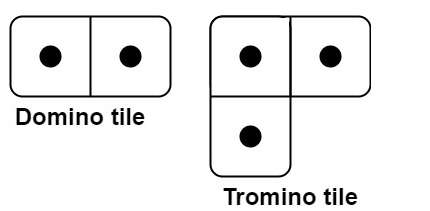
  + Given an integer n, return the number of ways to tile an 2 x n board. Since the answer may be very large, return it modulo 109 + 7.
  + In a tiling, every square must be covered by a tile. Two tilings are different if and only if there are two 4-directionally adjacent cells on the board such that exactly one of the tilings has both squares occupied by a tile.

* Alogrithm
  + state variables
    + create a 2-d dp array. The first dimension is n where the 2 x n board is built, and the second dimension is whether or not the obtained shape is even (0 is even and 1 is not even). 
    + The value of the array element correspond to the number of ways that this shape can be obtained from Domino and Trimino tilings
  + recurrence relationship
    + for a specific board with i units on the horizontal direction, there are three ways to get the even shape
      + from even shape of i-1 units and adding a domino vertically
      + from even shape of i-2 units and adding two domino horizontally
      + from one of the two non-even block of i-1 (up outstanding and down outstanding) and add a trimino
      + dp(i)(0) = dp(i-1)(0) + dp(i-2)(0) + 2dp(i-1)(1)
    + for a specific board with i units on the horizontal direction with n >=2, there are two ways to get non-even shape
      + add a domino to any of the up outstanding and down outstanding shape of i-1 (there are actually two ways in this category, but we count them as 1 to make it easier for calculating even cases)
      + add a trimino to even shape of i-2 (again, we can add either a up-outstanding or down-outstanding one, but we count these two ways as one)
      + dp(i)(1) = dp(i-1) + dp(i-2)
  + base cases
    + for n = 0, there is one way to generate even shape (this is imaginary to calculate dp(2)(1))
      + dp(0)(0) = 1
    + for n = 1, there is one way to generate even shape, and no way to generate non-even shape dp(1)(1) = 0
      + dp(1)(0) = 1
      + dp(1)(1) = 0 ( no need since all elements are initialized to 0)

In [6]:
class Solution:
    def numTilings(self, n: int) -> int:
        if n == 0:
            return 0
        
        dp = [[0] * 2 for _ in range(n+1)]
        N = 10**9 + 7
        
        # even blocks with 0 and 1 unit are 1
        dp[0][0] = dp[1][0] = 1
        
        for i in range(2, n+1):
            # even blocks with i units can be generated from even blocks with i-1 and i-2 units
            # and outstanding blocks with i-1 units by combining with a tromino. Noted that 
            # there are two types of outstanding blocks: upper and down outstanding blocks
            dp[i][0] = (dp[i-1][0] + dp[i-2][0] + 2 * dp[i-1][1]) % N
            
            # there are two ways to generate dp[i][1] from dp[i-2][0]: using a upper or down trimino
            # there are two ways to generate dp[i][1] from dp[i-1][1]: from a upper or down outstanding block
            # we count the upper and down outstanding cases as one and multiply by two in even shape calculation
            dp[i][1] = (dp[i-2][0] + dp[i-1][1]) % N
            
        # return the number of even blocks with n units
        return dp[n][0]    
            
        

### Leetcode 938 Minimum Cost for Tickets
* overview
  + given a list of days you will travel, and a costs list containing the cost of three types of tickets, 1-day, 7-day and 30-day passes (for example, if you get a 7-day pass on day 2, then you can travel for 7 days: days 2, 3, 4, 5, 6, 7 and 8
  + return the minimum number of dollars you need to travel every day in the given list of days
  
* algorithm
  + state variables
    + the current day. the value is the minimum cost that can cover all the days until and includes the current day
  + recurrence relationship
    + dp(i) = min(dp(i-1) + cost_of_1day, dp(i-7) + cost_of_7days, dp(i-30) + cost_of_30days) if i is in days, otherwises dp(i-1)
    + To get day i covered, if we plan to traver on day i, we buy the 3 ticket optionss plus the min cost covered until days i-1, i-7, and i-30
    
  + base cases
    + dp(0) = 0. we use max(0, day-k where k = 1, 7 and 30) in recurrence relationship, and return dp(last_day in days)
    + for top down, if days < 0, return 0, and recursively called to get minCost(1)
    
* time complexity:
  O(n) where n = the last day in days
* space complexity:
  O(n)
      

In [ ]:
# top down

from typing import List

class Solution:
    def mincostTickets(self, days: List[int], costs: List[int]) -> int:
        if not days or not costs:
            return 0
        
        durations = [1, 7, 30]
        
        @lru_cache(None)
        def dp(day: int) -> int:
            if day <= 0:
                return 0
            
            if day not in days:
                return dp(day-1)
            
            return min(dp(day-durations[i])+ costs[i] for i in range(3) )
        
        return dp(days[-1])
        

In [ ]:
# bottom up

from typing import List

class Solution:
    def mincostTickets(self, days: List[int], costs: List[int]) -> int:
        if not days or not costs:
            return 0
        
        durations = [1, 7, 30]
        n = days[-1]
        
        dp = [0] * (n + 1)
        
        for day in range(1, n+1):
            if day not in days:
                dp[day] = dp[day-1]
                continue
                
            pres = [ day-d if day > d else 0 for d in durations ]    
                
            dp[day] = min(dp[pres[i]] + costs[i] for i in range(3)) 
            
        print(dp)
        return dp[-1]    

### Leetcode 97 Interleaving String
* overview
  + Given strings s1, s2, and s3, find whether s3 is formed by an interleaving of s1 and s2.
  + An interleaving of two strings s and t is a configuration where s and t are divided into n and m substrings, respectively, such that:
    + s = s1 + s2 + ... + sn
    + t = t1 + t2 + ... + tm
    + |n - m| <= 1
    + The interleaving is s1 + t1 + s2 + t2 + s3 + t3 + ... or t1 + s1 + t2 + s2 + t3 + s3 + ...
  + Note: a + b is the concatenation of strings a and b.
  
* algorithm
  + state variables:
    + i and j represents the lenght of substrings of s1 and s2 that can match the substring of s3 of length i+j by combining the substrings from s1 and s2
    + we construct a two-d matrix. rows and columns correspond to s1 and s2, respectively
      + the first row (i=0) corresponds to empty s1 substring with no letters selected
      + the first column (j=0) corresponds to empty s2 substring with no letters selected
  + recurrence relationship    
    + for each i, j combinations to match s3 substring with length of i+j, there are two possibilities:
      + the letter of s1(i-1) matches the current letter of s3(i+j-1), to make this as a valid solution, dp(j) must be true, since in the i, j combination, we are consuming the letter from s1, so all the first j letters in s2 and first i-1 letters in s1 must have their matches in s3  
      + the letter of s2(j-1) metches the current letter of s3(i+j-1), then dp(j-1) must be true, since we are using the jth letter from s2, all first j-1 letters in s2 and all first i letters from s1 much find matches in s3
      
    + in space optimized bottom up algorithm, we use a one-dimensional dp array on s2 dimension because according to recurrance relationship, to derive the state of i, j, we only need two state combinations: 
      + dp(i-1)(j) if s1(i-1) == s3(i+j-1)  
      + dp(i)(j-1) if s2(j) == s3(i+j-1)
      + therefore, we use a commonly used strategy to optimize space, by using one d array with n2+1 length
      + note that when i == 0 and j > 0, we only have one option: compare s2(j-1) to s3(j-1) and dp(j-1) is True. This dp(j-1) corresponding to the current iteration of i on s1 dimension
      + note that when j == 0 and i > 0, we only have one option: compare s1(i-1) to s3(i-1) and dp(j) is True. Here dp(j) corresponding to dp(i-1)dp(j) obtained from the last iteration of i-1 on s1 dimension
      + when both i > 0 and j > 0, dp(j) is true when either (s1(i-1)==s3(i+j-1) and dp(j)) or (s2(j-1)==s3(i+j-1) and dp(j-1))
    + finally return dp(n2) out of for loop   

In [ ]:
# top down

From typing import List

class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        if not s1 and not s2 and not s3:
            return True
        if not s3:
            return False
        if not s1:
            return s2 == s3
        if not s2:
            return s1 == s3
        
        n1, n2, n3 = len(s1), len(s2), len(s3)
        if n1 + n2 != n3:
            return False
        
        @lru_cache(None)
        def dp(i: int, j: int) -> bool:
            if i == 0 and j == 0:
                return True
            
            # if s2 doesn't contribute, and only consider s1, we consider the match of current letter in s1
            # and the letter left to it. If the first letter in s1 doesn't match the first letter in s3, even
            # if the second letter of s1 and s3 matches, the return is False, since we need to get all letters 
            # from the start to the current in s1 to match s3
            if i == 0:
                return s2[j-1] == s3[j-1] and dp(0, j-1)
            
            # same logic as i == 0
            if j == 0:
                return s1[i-1] == s3[i-1] and dp(i-1, 0)
            
            # if i > 0 and j >0, return except the two cases are True, return False
            return (s1[i-1] == s3[i+j-1] and dp(i-1, j)) or (s2[j-1] == s3[i+j-1] and dp(i, j-1))
                
        
        return dp(n1, n2)
        

In [13]:
# bottom up

from typing import List

class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        if not s1 and not s2 and not s3:
            return True
        
        if not s3:
            return False
        
        if not s1:
            return s2 == s3
        
        if not s2:
            return s1 == s3
        
        n1, n2, n3 = len(s1) , len(s2), len(s3)
        if n1 + n2 != n3:
            return False
        
        dp = [False] * (n2+1)
        
        # state variables i, j corresponding to the lengths of substrings of s1 and s2
        # that can be matched to s3 or not
        
        for i in range(n1+1):
            for j in range(n2+1):
                if i == 0 and j == 0:
                    dp[j] = True
                
                # if s1 contributes an empty string, dp[j] is true when
                # the current jth letter in s2 matches s3 and the first j-1 letters from s3 are matched
                elif i == 0 and j > 0:
                    dp[j] = s2[j-1] == s3[j-1] and dp[j-1]
                    
                # if s2 contributes an empty string, dp[0] is true when s1's ith letter matches s3's
                # ith letter, and the first i-1 the letters from s1 are matched. Here dp[j] is the dp[0]
                # from loop i-1
                elif j == 0 and i > 0:
                    dp[j] = s1[i-1] == s3[i-1] and dp[j]
                    
                # two cases for true: 1. you use the ith letter from s1, and s2's first jth letters and s1's 
                # first i-1th letters are matched, which is dp[j]
                # 2. you use the jth letters from s2, and the first ith letters from s1 are and s2's first j-1th                 # letters are mmatched
                else:
                    dp[j] = (s1[i-1] == s3[i+j-1] and dp[j]) or (s2[j-1] == s3[i+j-1] and dp[j-1])
        
        return dp[n2]
        
        